In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn as sns

In [3]:
print(pd.__version__)
print(np.__version__)

0.24.2
1.16.4


In [4]:
pricedata=pd.read_csv('C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/Crowd-Sourced_Price_Collection_CSV1.csv',index_col=0)

In [5]:
type(pricedata)

pandas.core.frame.DataFrame

In [6]:
print(pricedata.shape)
pricedatacleaned=pricedata.dropna(how="all",axis=1)   ## If there are many Not a Number (NaN) values in the file
print(pricedatacleaned.shape)

(505567, 17)
(505567, 17)


In [9]:
pricedatacleaned.Country.unique()
pricedatacleaned.columns

Index(['Country', 'Location Code', 'Location Name', 'Outlet Code',
       'Outlet Type', 'Obs Date (yyyy-MM-dd)', 'Product Code', 'Product Name',
       'Pref. Qty', 'Obs. Qty', 'Quantity', 'Obs. UoM Code', 'Obs Price',
       'Conv. Price', 'Price Type Name', 'Rejected', 'Currency'],
      dtype='object')

In [10]:
## Column formatting to replace spaces with underscores and periods with nothing

pricedatacleaned.columns = pricedatacleaned.columns.map(lambda x: x.replace(" ","_"))
pricedatacleaned.columns = pricedatacleaned.columns.map(lambda x: x.replace(".",""))

In [11]:
pricedatacleaned.columns

Index(['Country', 'Location_Code', 'Location_Name', 'Outlet_Code',
       'Outlet_Type', 'Obs_Date_(yyyy-MM-dd)', 'Product_Code', 'Product_Name',
       'Pref_Qty', 'Obs_Qty', 'Quantity', 'Obs_UoM_Code', 'Obs_Price',
       'Conv_Price', 'Price_Type_Name', 'Rejected', 'Currency'],
      dtype='object')

In [26]:
pricedatacleaned["date"] = pd.to_datetime(pricedatacleaned["Obs_Date_(yyyy-MM-dd)"],format="%m/%d/%Y",infer_datetime_format=False,exact=True)

In [28]:
print(pricedatacleaned[ 'Obs_Date_(yyyy-MM-dd)'].head())
print(pricedatacleaned[ 'date'].head())

del pricedatacleaned['Obs_Date_(yyyy-MM-dd)']

Line
1    3/16/2012
2    3/16/2012
3    3/16/2012
4    3/16/2012
5    3/16/2012
Name: Obs_Date_(yyyy-MM-dd), dtype: object
Line
1   2012-03-16
2   2012-03-16
3   2012-03-16
4   2012-03-16
5   2012-03-16
Name: date, dtype: datetime64[ns]


In [31]:
pricedatacleaned.columns
#pricedatacleaned.head()

Index(['Country', 'Location_Code', 'Location_Name', 'Outlet_Code',
       'Outlet_Type', 'Product_Code', 'Product_Name', 'Pref_Qty', 'Obs_Qty',
       'Quantity', 'Obs_UoM_Code', 'Obs_Price', 'Conv_Price',
       'Price_Type_Name', 'Rejected', 'Currency', 'date'],
      dtype='object')

In [33]:
## Checking what are the elements and the values they have in the dataset
productpricecounts=pricedatacleaned.Product_Name.value_counts()
countries=pricedatacleaned.Country.unique()
currency=pricedatacleaned.Currency.unique()
print("Countries in the dataset are :\n",pricedatacleaned.Country.unique())
print("Currencies in the dataset are :\n",pricedatacleaned.Currency.unique())
print("Product counts in the dataset are :\n",pricedatacleaned.Product_Name.value_counts())

Countries in the dataset are :
 ['Bangladesh' 'Brazil' 'India' 'Indonesia' 'Kenya' 'Nigeria' 'Pakistan'
 'Philippines']
Currencies in the dataset are :
 ['USD']
Product counts in the dataset are :
 Coca Cola / Pepsi Cola             18081
Sugar, white                       17902
Chicken eggs                       17847
Milk                               17547
Chicken legs                       17520
Sunflower oil                      17480
Soybean oil                        17411
Potatoes, brown                    17350
Carrots                            17317
Banana                             17276
Bread, white, sliced               17207
Palm oil                           17198
Apple                              17152
Onion                              17044
Rice, white, broken                16950
Orange                             16861
Rice, long grain                   16770
Beans, white, dried                16764
Instant coffee, Nescafe Classic    16748
Maize                  

Text(0.5, 0, 'Products')

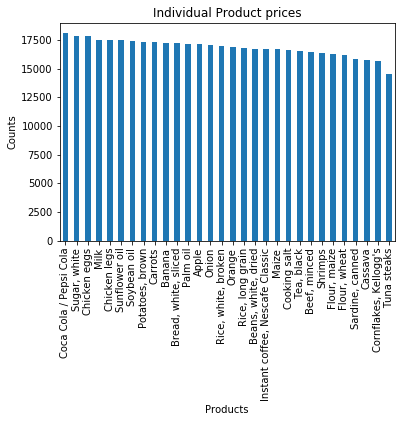

In [39]:
productpricecounts.plot(kind='bar',title="Individual Product prices")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Products")

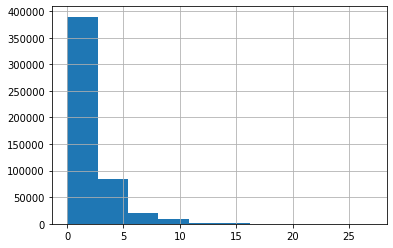

In [36]:
pricedatacleaned.head()
pricedatacleaned.Conv_Price.hist()

In [57]:
sodaprices=pricedatacleaned[pricedatacleaned.Product_Name=='Coca Cola / Pepsi Cola']
sodapricegroups = sodaprices.groupby('date')
sodapricemean = sodapricegroups['Conv_Price'].agg(np.mean)
sodapriceerr = sodapricegroups['Conv_Price'].agg(stats.sem)



Text(0, 0.5, 'Cost per standard unit :USD')

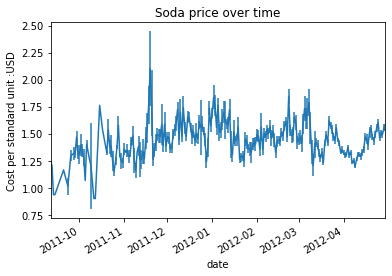

In [58]:
sodapricemean.plot(yerr=sodapriceerr,title = "Soda price over time")
sns.mpl.pyplot.ylabel("Cost per standard unit :USD")

Text(0, 0.5, 'Cost Per Standard Unit, USD')

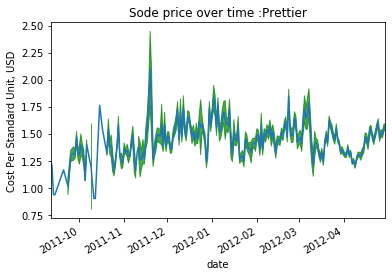

In [59]:
sodapricemean.plot(title="Sode price over time :Prettier")
sns.mpl.pyplot.fill_between(x=sodapricemean.index, y1=sodapricemean-sodapriceerr, y2=sodapricemean+sodapriceerr, color='g', alpha=0.7)
sns.mpl.pyplot.ylabel("Cost Per Standard Unit, USD")

Text(0, 0.5, 'Cost per standard unit in USD')

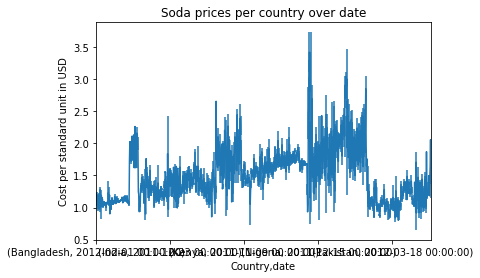

In [60]:
### Per country soda prices over time
sodagroupspercountry=sodaprices.groupby(['Country','date'])

sodacountrymean=sodagroupspercountry['Conv_Price'].agg(np.mean)
sodacountryerr=sodagroupspercountry['Conv_Price'].agg(stats.sem)

sodacountrymean.plot(yerr=sodacountryerr,title="Soda prices per country over date")
sns.mpl.pyplot.ylabel("Cost per standard unit in USD")

In [61]:
print(pricedatacleaned.head())
print("")
print(sodapricemean.head())
print("")
print(sodacountrymean.head(50))

         Country  Location_Code Location_Name  Outlet_Code  Outlet_Type  \
Line                                                                      
1     Bangladesh              1        Alipur         2570  Supermarket   
2     Bangladesh              1        Alipur         2570  Supermarket   
3     Bangladesh              1        Alipur         2570  Supermarket   
4     Bangladesh              1        Alipur         2570  Supermarket   
5     Bangladesh              1        Alipur         2570  Supermarket   

      Product_Code           Product_Name  Pref_Qty  Obs_Qty Quantity  \
Line                                                                    
1               11       Rice, long grain       1.0      1.0     1 kg   
2               12    Rice, white, broken       1.0      1.0     1 kg   
3               12    Rice, white, broken       1.0      1.0     1 kg   
4               13  Cornflakes, Kellogg's     500.0    500.0    500 g   
5               14           Flour, 

In [62]:
unstackedsodacountrymean = sodacountrymean.unstack(level=0)
unstackedsodacountryerr = sodacountryerr.unstack(level=0)
print(unstackedsodacountrymean.head())
print(unstackedsodacountrymean.tail())

Country     Bangladesh  Brazil     India  Indonesia  Kenya  Nigeria  Pakistan  \
date                                                                            
2011-09-11         NaN     NaN  1.248738        NaN    NaN      NaN       NaN   
2011-09-12         NaN     NaN  1.202488        NaN    NaN      NaN       NaN   
2011-09-13         NaN     NaN  0.936553        NaN    NaN      NaN       NaN   
2011-09-14         NaN     NaN  0.936553        NaN    NaN      NaN       NaN   
2011-09-20         NaN     NaN  1.165488        NaN    NaN      NaN       NaN   

Country     Philippines  
date                     
2011-09-11          NaN  
2011-09-12          NaN  
2011-09-13          NaN  
2011-09-14          NaN  
2011-09-20          NaN  
Country     Bangladesh    Brazil     India  Indonesia     Kenya   Nigeria  \
date                                                                        
2012-04-26    1.097839  1.997481  1.235089   2.390898  1.670572  2.055503   
2012-04-27    1.088

In [ ]:
unstackedsodacountrymean.plot(yerr=unstackedsodacountryerr,title = "Per country Daily Soda Prices")
sns.mpl.pyplot.ylabel("Cost per standard unit")

In [ ]:
unstackedsodacountrymean.plot(yerr=unstackedsodacountryerr,title = "Per country Daily Soda Prices",subplots=True,figsize=(12,6),layout=(2,4))
sns.mpl.pyplot.ylabel("Cost per standard unit")

In [ ]:
## Y axis is not same among the subplots and so hard to interpret
unstackedsodacountrymean.plot(yerr=unstackedsodacountryerr,title = "Per country Daily Soda Prices",subplots=True,figsize=(12,6),layout=(2,4),sharey=True)
sns.mpl.pyplot.ylabel("Cost per standard unit")

Text(0, 0.5, 'Cost per standard unit')

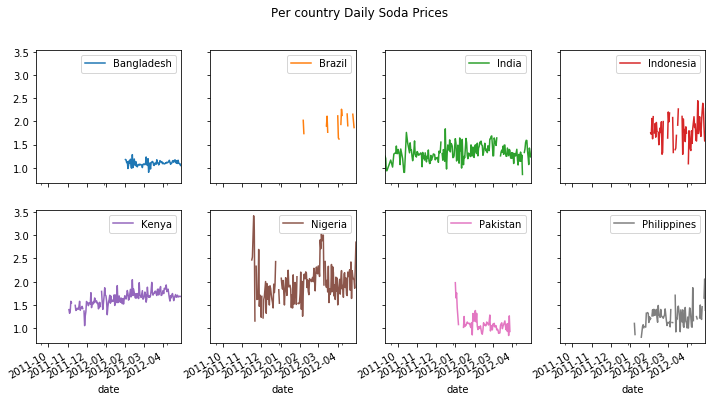

In [69]:
## Visualizing only the means without errors
## Y axis is not same among the subplots and so hard to interpret
unstackedsodacountrymean.plot(title = "Per country Daily Soda Prices",subplots=True,figsize=(12,6),layout=(2,4),sharey=True)
sns.mpl.pyplot.ylabel("Cost per standard unit")

In [72]:
## Plotting data in rolling periods

TenDayRollingSodaMean=sodapricemean.rolling(window=10,min_periods=4).mean()
TenDayRollingSodaStd=sodapricemean.rolling(window=10,min_periods=4).std()

In [73]:
print(RollingSodaMean)

date
2011-09-11         NaN
2011-09-12         NaN
2011-09-13         NaN
2011-09-14    1.081083
2011-09-20    1.097964
2011-09-23    1.084070
2011-09-25    1.114284
2011-09-27    1.124194
2011-09-28    1.139472
2011-09-29    1.215469
2011-09-30    1.268152
2011-10-01    1.288351
2011-10-02    1.342658
2011-10-03    1.349459
2011-10-04    1.343771
2011-10-05    1.309245
2011-10-06    1.300086
2011-10-08    1.293793
2011-10-09    1.278698
2011-10-11    1.208150
2011-10-12    1.144969
2011-10-15    1.214039
2011-10-17    1.281155
2011-10-20    1.269331
2011-10-21    1.308752
2011-10-22    1.333812
2011-10-23    1.403315
2011-10-24    1.452444
2011-10-25    1.365239
2011-10-26    1.323388
                ...   
2012-04-01    1.408241
2012-04-02    1.388287
2012-04-03    1.352329
2012-04-04    1.342488
2012-04-05    1.326561
2012-04-06    1.326055
2012-04-07    1.308803
2012-04-08    1.298690
2012-04-09    1.283651
2012-04-10    1.277734
2012-04-11    1.268145
2012-04-12    1.268506
2012-0

c:\users\madhumita.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\madhumita.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\madhumita.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\madhumita.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\users\madhumita.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:538

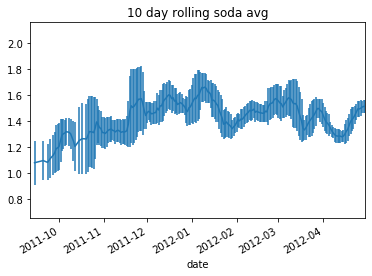

In [74]:
TenDayRollingSodaMean.plot(yerr=TenDayRollingSodaStd,title="10 day rolling soda avg")
sns.mpl.pyplot.fill_between(TenDayRollingSodaMean.index,TenDayRollingSodaMean-2*TenDayRollingSodaStd,TenDayRollingSodaMean+2*TenDayRollingSodaStd,color='b',alpha=0)

In [78]:
##Resample time series
print(sodaprices["Conv_Price"])

Line
34        1.202412
62        1.155134
90        0.962612
118       1.082171
147       0.770089
202       1.062388
203       1.062388
232       1.082938
260       2.165877
290       1.442894
320       1.442894
375       1.082171
376       1.082171
405       1.082171
435       1.038779
465       1.227648
495       1.180431
577       1.062388
578       0.944345
579       0.944345
626       0.826302
627       1.062388
730       0.885323
731       0.873519
732       0.826302
733       1.888690
765       1.298474
849       1.133214
850       1.062388
851       0.826302
            ...   
505858    1.272740
505886    1.783519
505917    1.752501
505918    1.600514
505940    1.137116
505967    1.557693
505996    1.308462
506005    1.046848
506036    1.098655
506063    0.801103
506120    1.029989
506121    0.801103
506151    1.395959
506155    1.286778
506188    1.091811
506218    1.116638
506248    1.116638
506278    1.004974
506318    0.911250
506348    1.401923
506377    1.411556
506407 

Text(0.5, 1.0, 'All Soda Prices')

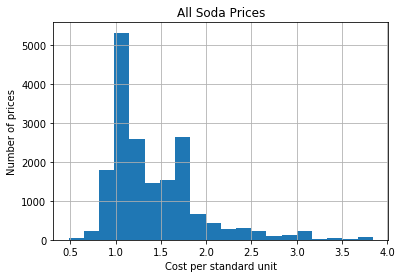

In [77]:
##Histograms

sodaprices["Conv_Price"].hist(bins=20)
sns.mpl.pyplot.ylabel("Number of prices")
sns.mpl.pyplot.xlabel("Cost per standard unit")
sns.mpl.pyplot.title("All Soda Prices")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153714F0>,
      dtype=object)

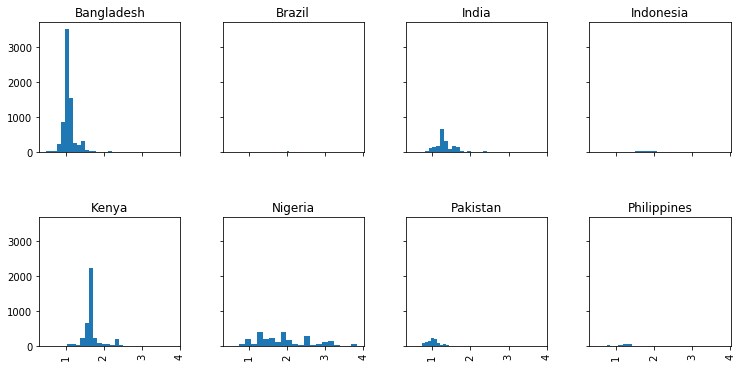

In [79]:
## Histograms by country (another attribute)
sodaprices["Conv_Price"].hist(by=sodaprices['Country'],bins=20,layout=(2,4),figsize=(12,6),sharex=True,sharey=True)

Text(0.5, 1.0, 'Stacked-per country histogram')

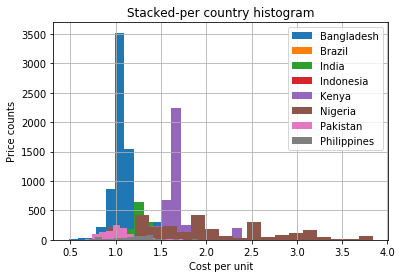

In [82]:
stackedhistogram=sodaprices["Conv_Price"].groupby(sodaprices["Country"]).hist(bins=20)
sns.mpl.pyplot.xlabel("Cost per unit")
sns.mpl.pyplot.ylabel("Price counts")
sns.mpl.pyplot.legend(stackedhistogram.index)
sns.mpl.pyplot.title("Stacked-per country histogram")

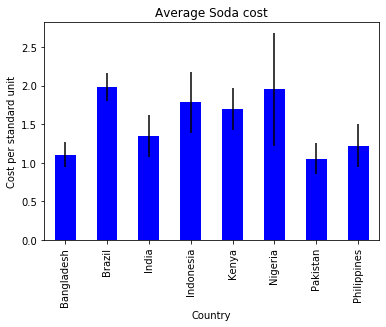

In [86]:
## Bar graphs
errs=sodaprices.groupby('Country')['Conv_Price'].agg(np.std)
sodaprices.groupby('Country')['Conv_Price'].agg(np.mean).plot(yerr=errs,kind='bar',title="Average Soda cost",color='b')
sns.mpl.pyplot.ylabel("Cost per standard unit")
sns.mpl.pyplot.savefig("Bar_Graph")